<a href="https://colab.research.google.com/github/dnbaldwin/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimisation_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [182]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [183]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], axis=1, inplace=True)

In [184]:
# Determine the number of unique values in each column.
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [185]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [186]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [187]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [188]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x: x>1]



C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [189]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = application_df['CLASSIFICATION'].value_counts().loc[lambda x: x==1]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
print(classifications_to_replace)


C2190    1
C4200    1
C2600    1
C5200    1
C1370    1
C1248    1
C6100    1
C1820    1
C1900    1
C1236    1
C3700    1
C2570    1
C1580    1
C1245    1
C2500    1
C1570    1
C1283    1
C2380    1
C1732    1
C1728    1
C2170    1
C4120    1
C8210    1
C2561    1
C4500    1
C2150    1
Name: CLASSIFICATION, dtype: int64


In [190]:
# Convert categorical data to numeric with `pd.get_dummies`

#pd.get_dummies(application_df, columns=['CLASSIFICATION'])

application_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])


In [191]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [192]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [193]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

#  1. Initial model

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=108))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=9, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 5)                 545       
                                                                 
 dense_78 (Dense)            (None, 9)                 54        
                                                                 
 dense_79 (Dense)            (None, 1)                 10        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [194]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [195]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6056 - accuracy: 0.6947
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5665 - accuracy: 0.7206
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5594 - accuracy: 0.7221
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7283
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7293
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7286
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.7289
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7301
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7301
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7302

In [196]:
# Export our model to HDF5 file
nn.save("model_1.keras")


In [197]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5519 - accuracy: 0.7294 - 424ms/epoch - 2ms/step
Loss: 0.5519278049468994, Accuracy: 0.7294460535049438


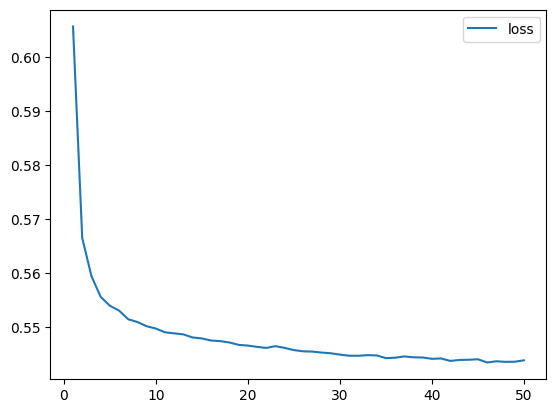

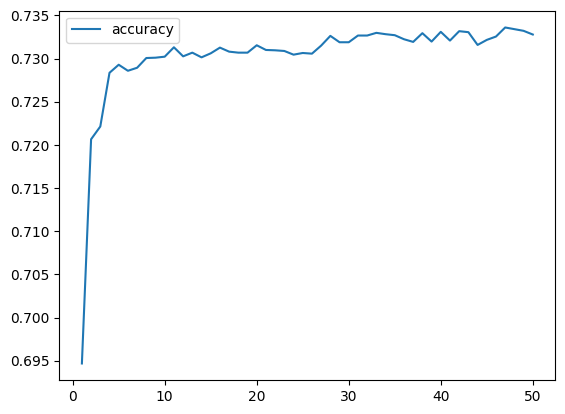

In [198]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")
plt.show()

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [199]:
#  2. Second model

# Increase number of nodes. Keep number of layers the same

# set nodes and hidden layers

hidden_nodes_layer1 = 27
hidden_nodes_layer2 = 54

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=108))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 27)                2943      
                                                                 
 dense_81 (Dense)            (None, 54)                1512      
                                                                 
 dense_82 (Dense)            (None, 1)                 55        
                                                                 
Total params: 4510 (17.62 KB)
Trainable params: 4510 (17.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [201]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5813 - accuracy: 0.7161
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5560 - accuracy: 0.7277
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7301
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7302
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7308
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.7320
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5460 - accuracy: 0.7328
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7326
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5441 - accuracy: 0.7336
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5441 - accuracy: 0.7332

In [202]:
# Export our model to HDF5 file
nn.save("model_2.keras")


In [203]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5587 - accuracy: 0.7305 - 428ms/epoch - 2ms/step
Loss: 0.5587088465690613, Accuracy: 0.7304956316947937


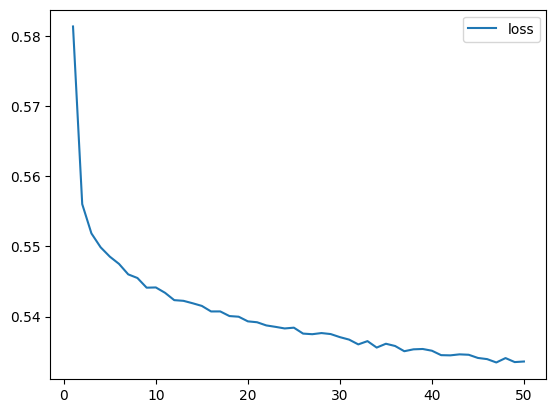

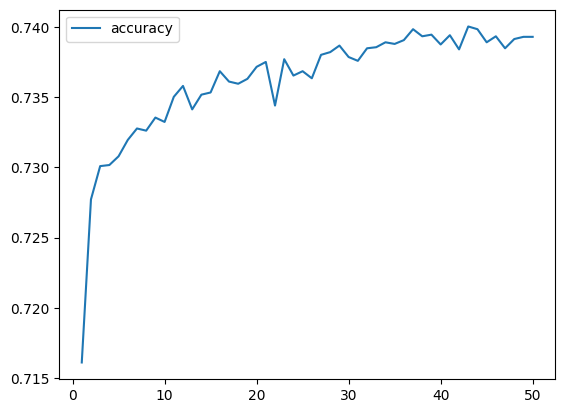

In [204]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")
plt.show()

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [205]:
#  3. Third model

# increase number of layers to 3. Number of eposhs unchanged

# set nodes and hidden layers

hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=108))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 15)                1635      
                                                                 
 dense_84 (Dense)            (None, 30)                480       
                                                                 
 dense_85 (Dense)            (None, 60)                1860      
                                                                 
 dense_86 (Dense)            (None, 1)                 61        
                                                                 
Total params: 4036 (15.77 KB)
Trainable params: 4036 (15.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [207]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5834 - accuracy: 0.7094
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5560 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5520 - accuracy: 0.7298
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7314
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5459 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7320
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5440 - accura

In [ ]:
# Export our model to HDF5 file
nn.save("model_3.keras")


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")
plt.show()

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
#  4. Fourth model

# increase number of epochs to 100

# set nodes and hidden layers

hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 9

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=108))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

NameError: name 'nn' is not defined

In [ ]:
# Export our model to HDF5 file
nn.save("model_4.keras")


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")
plt.show()

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()